### Desafio: hora da prática

#### Capitulo 1 - Conhecendo os dados

Chegou o momento de praticar! Vamos aplicar os conceitos aprendidos durante a aula a partir de algumas atividades. Solucione os problemas propostos através de códigos utilizando a base de dados disponibilizada no curso.

1. Encontre os valores únicos das colunas "Nível 1 - Setor" e "Estado" para identificar as atividades econômicas presentes na base de dados e se todos os Estados do Brasil estão presentes no DataFrame.

2. Filtre o DataFrame somente com os dados dos Estados da região Sul do Brasil.

3. Filtre o DataFrame para exibir apenas os registros em que o campo "Nível 1 - Setor" seja igual a "Mudança de Uso da Terra e Floresta" e o campo "Estado" seja igual a "AM" (sigla para o Estado do Amazonas).

4. Encontre o valor máximo de emissão do ano de 2021 para os dados de "Agropecuária" no Estado do Pará.

Caso precise de ajuda, opções de solução das atividades estarão disponíveis na seção “Opinião da pessoa instrutora”.

In [2]:
import pandas as pd

In [3]:
gases_emitidos = pd.read_excel('pandas-selecao_agrupamento/base_dados_seeg.xlsx', sheet_name='GEE Estados')
gases_emitidos.head()

c:\Users\amsbr\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


##### 1. Encontre os valores únicos das colunas "Nível 1 - Setor" e "Estado" para identificar as atividades econômicas presentes na base de dados e se todos os Estados do Brasil estão presentes no DataFrame.

In [4]:
gases_emitidos['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [5]:
gases_emitidos['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR', 'BR'], dtype=object)

##### 2. Filtre o DataFrame somente com os dados dos Estados da região Sul do Brasil.

In [6]:
estados_sul = ['PR','SC','RS']

In [7]:
gases_emitidos['Estado'].isin(estados_sul)

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Estado, Length: 103312, dtype: bool

In [8]:
gases_emitidos['Estado'].isin(estados_sul).value_counts()

Estado
False    91100
True     12212
Name: count, dtype: int64

In [9]:
gases_emitidos[gases_emitidos['Estado'].isin(estados_sul)]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2 (t),PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
36,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
37,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2e (t) GTP-AR2,PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
110,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),PR,CIM,...,2.012596e+06,2.212002e+06,2.241143e+06,2.176752e+06,2.279061e+06,2.115372e+06,2.173266e+06,2.230656e+06,2.488650e+06,2.845457e+06
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),SC,CIM,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,5.272686e+05,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,RS,AGROPEC,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,7.698680e+05,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,RS,AGROPEC,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,8.308050e+05,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,RS,AGROPEC,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,8.475340e+05,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,RS,AGROPEC,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,8.553060e+05,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


3. Filtre o DataFrame para exibir apenas os registros em que o campo "Nível 1 - Setor" seja igual a "Mudança de Uso da Terra e Floresta" e o campo "Estado" seja igual a "AM" (sigla para o Estado do Amazonas).

In [10]:
(gases_emitidos['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta')

0         False
1         False
2         False
3         False
4         False
          ...  
103307     True
103308     True
103309     True
103310     True
103311     True
Name: Nível 1 - Setor, Length: 103312, dtype: bool

In [11]:
((gases_emitidos['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta') & (gases_emitidos['Estado'] == 'AM')).value_counts()

False    102958
True        354
Name: count, dtype: int64

In [12]:
filtro_am = (gases_emitidos['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta') & (gases_emitidos['Estado'] == 'AM')

In [13]:
gases_emitidos[filtro_am]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2 (t),AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR2,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR4,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR5,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR6,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,AM,AGROPEC,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,AM,AGROPEC,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,AM,AGROPEC,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,AM,AGROPEC,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


4. Encontre o valor máximo de emissão do ano de 2021 para os dados de "Agropecuária" no Estado do Pará.

In [14]:
filtro2 = (gases_emitidos['Nível 1 - Setor'] == 'Agropecuária') & (gases_emitidos['Estado'] == 'PA')

In [15]:
((gases_emitidos['Nível 1 - Setor'] == 'Agropecuária') & (gases_emitidos['Estado'] == 'PA')).value_counts()

False    102438
True        874
Name: count, dtype: int64

In [16]:
gases_emitidos.loc[filtro2, 2021].max()

36856969.7986

#### Capitulo 2 - Agrupamento de dados

Chegou o momento de praticar! Vamos aplicar os conceitos aprendidos durante a aula a partir de algumas atividades. Solucione os problemas propostos através de códigos utilizando a base de dados disponibilizada no curso.

1) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as chaves de grupos formados e a lista de índices de cada grupo.

2) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

3) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada atividade econômica no ano de 2021.

4) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada atividade econômica. Ordene os dados da maior para menor emissão.

##### PRIMEIRO PASSO, AJUSTAR O DATASET

In [17]:
# aqui eu tenho consigo verificar se eu tenho dados relacionados apenas a emissao. No caso, preciso excluir as informacoes de Bunker e Remocao, Remocao NCI
gases_emitidos['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [18]:
filtro = (gases_emitidos['Emissão / Remoção / Bunker'] == 'Emissão') | (gases_emitidos['Emissão / Remoção / Bunker'] == 'Emissão NCI')
filtro.value_counts()

Emissão / Remoção / Bunker
True     95300
False     8012
Name: count, dtype: int64

In [19]:
teste = gases_emitidos.copy()
dados = teste[filtro]

In [20]:
# para conhecimento o iloc funciona para utilizar o index da coluna que quero separar
dados.iloc[:,0:11]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103307,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,NaN
103308,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,NaN
103309,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,NaN
103310,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,NaN


In [21]:
# jó o loc devo passar o nome da coluna, ou posso usar essa abordagem se quiser trabalhar com o index da coluna: col_names = dados.columns[0:10] e dps dados.loc[:, col_names]     
dados.loc[:,'Nível 1 - Setor':'Produto']

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103307,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,NaN
103308,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,NaN
103309,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,NaN
103310,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,NaN


In [22]:
colunas_a_manter = dados.loc[:,'Nível 1 - Setor':'Produto'].columns
colunas_a_manter

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Emissão / Remoção / Bunker', 'Gás', 'Estado',
       'Atividade Econômica', 'Produto'],
      dtype='object')

In [23]:
# agora vou selecionar as colunas que vou derreter (metodo melt)
dados.loc[:,1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0.0,0.000,0.000,0.000,0.00,16.728,1.552576e+02,1.629552e+02,2.314992e+02,3.082848e+02,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,8.976000e+02,897.600
1,6210.0,6116.580,7747.650,8276.580,9366.30,9675.720,1.299105e+04,1.389312e+04,1.448847e+04,1.459296e+04,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,1.300000e+02,130.000
2,368.0,362.464,459.120,490.464,555.04,573.376,7.698400e+02,8.232960e+02,8.585760e+02,8.647680e+02,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1.380576e+03,1380.576
3,115.0,113.270,143.475,153.270,173.45,179.180,2.405750e+02,2.572800e+02,2.683050e+02,2.702400e+02,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,4.314300e+02,431.430
4,1925100.0,1896139.800,2401771.500,2565739.800,2903553.00,2999473.200,4.027226e+06,4.306867e+06,4.491426e+06,4.523818e+06,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,4.030000e+04,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103307,0.0,0.000,0.000,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2731963.400,1091033.900,853275.300,1003731.400,1615000.600,1552258.800,216231.900,2805297.300,9.659261e+06,0.000
103308,0.0,0.000,0.000,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2921341.000,1144504.000,896685.000,1074717.000,1763431.000,1706030.000,252599.000,3105007.000,1.053571e+07,0.000
103309,0.0,0.000,0.000,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2950049.000,1151848.000,902209.000,1084073.000,1782863.000,1726958.000,257507.000,3147567.000,1.067568e+07,0.000
103310,0.0,0.000,0.000,0.000,0.00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2957780.000,1152868.000,902368.000,1084826.000,1784237.000,1729598.000,258068.000,3155415.000,1.072232e+07,0.000


In [24]:
colunas_a_derreter = dados.loc[:,1970:2021].columns
colunas_a_derreter

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [25]:
dados.melt(id_vars= colunas_a_manter,value_vars= colunas_a_derreter,var_name='Ano',value_name='Emissao')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955595,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
4955596,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
4955597,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
4955598,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


In [26]:
# agora eu já sei que meu dados estao tratando apenas de emissao, portando vou excluir a coluna Emissão / Remoção / Bunker porqye é desnecessária

emissao_gases = dados.melt(id_vars= colunas_a_manter,value_vars= colunas_a_derreter,var_name='Ano',value_name='Emissao')

In [27]:
emissao_gases = emissao_gases.drop(columns='Emissão / Remoção / Bunker')

##### 1) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as chaves de grupos formados e a lista de índices de cada grupo.

In [28]:
# agora com os dados prontos vou comecar a responder as perguntas que foram feitas
emissao_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4955595,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
4955596,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
4955597,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
4955598,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


In [29]:
emissao_gases.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23763, 23764, 23765, 23766, 23767, 23768, 23769, 23770, 23771, 23772, 23773, 23774, 23775, 23776, 23777, 23778, 23779, 23780, 23781, 23782, 23783, 23784, 23785, 23786, 23787, 23788, 23789, 23790, 23791, 23792, 23793, 23794, 23795, 23796, 23797, 23798, 23799, 23800, 23801, 23802, 23803, 23804, 23805, 23806, 23807, 23808, 23809, 23810, 23811, 23812, 23813, 23814, 

##### 2) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

In [30]:
emissao_gases.groupby('Nível 1 - Setor').get_group('Agropecuária')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000e+00
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2.050446e+03
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000e+00
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000e+00
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,4.669347e+02
...,...,...,...,...,...,...,...,...,...,...,...,...
4884058,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Convencional,CO2e (t) GTP-AR6,RS,AGR,ALIM_BEBIDAS,2021,3.525005e+06
4884059,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Convencional,CO2e (t) GTP-AR6,MS,AGR,ALIM_BEBIDAS,2021,5.057791e+06
4884060,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Convencional,CO2e (t) GTP-AR6,MT,AGR,ALIM_BEBIDAS,2021,1.288481e+07
4884061,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Convencional,CO2e (t) GTP-AR6,GO,AGR,ALIM_BEBIDAS,2021,4.941441e+06


##### 3) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada atividade econômica no ano de 2021.

In [31]:
emissao_gases['Ano'] == 2021

0          False
1          False
2          False
3          False
4          False
           ...  
4955595     True
4955596     True
4955597     True
4955598     True
4955599     True
Name: Ano, Length: 4955600, dtype: bool

In [32]:
filtro_ano = emissao_gases['Ano'] == 2021

In [33]:
emissao_gases[filtro_ano].groupby('Nível 1 - Setor').value_counts()

Nível 1 - Setor  Nível 2                               Nível 3                   Nível 4             Nível 5           Nível 6                            Gás      Estado  Atividade Econômica  Produto       Ano   Emissao   
Agropecuária     Cultivo de Arroz                      Diretas                   Outros              Vegetal           Arroz                              CH4 (t)  AC      AGR                  ALIM_BEBIDAS  2021  0.000000      1
                                                                                                                                                                   AL      AGR                  ALIM_BEBIDAS  2021  930.957040    1
                                                                                                                                                                   AM      AGR                  ALIM_BEBIDAS  2021  0.000000      1
                                                                                             

In [34]:
emissao_gases[filtro_ano].groupby('Nível 1 - Setor')[['Emissao']].value_counts()

Nível 1 - Setor  Emissao     
Agropecuária     0.000000e+00    1557
                 3.684517e+02       9
                 7.689427e+02       9
                 1.329630e+03       9
                 3.089837e+03       9
                                 ... 
Resíduos         7.655912e+06       1
                 7.939465e+06       1
                 8.191648e+06       1
                 8.846980e+06       1
                 9.174646e+06       1
Name: count, Length: 58205, dtype: int64

In [35]:
emissao_gases[filtro_ano].groupby('Nível 1 - Setor')[['Emissao']].mean()

,Emissao
Nível 1 - Setor,
Agropecuária,233294.264496
Energia,72928.637234
Mudança de Uso da Terra e Floresta,687060.026704
Processos Industriais,787101.255789
Resíduos,106106.723386


##### 4) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada atividade econômica. Ordene os dados da maior para menor emissão.

In [36]:
emissao_gases.groupby('Nível 1 - Setor')[['Emissao']].sum().sort_values('Emissao',ascending=False)

,Emissao
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.783624e+11
Agropecuária,1.851510e+11
Energia,1.205314e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


#### Capitulo 3 - Agrupamentos multi-index

##### Desafio: emissão por setor econômico

Uma das tarefas passadas pela equipe de supervisão do órgão ambiental era de encontrar a emissão média de cada gás por ano. Conseguimos realizar essa tarefa usando o método ```groupby()``` e ```pivot_table()``` para gerar uma tabela contendo a emissão ao longo dos anos para cada um dos gases.

A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos. Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método ```pivot_table``` para a construção da tabela, sem utilizar o método ```groupby```.

Você pode buscar informações de como fazer isso na [documentação Pandas sobre o método pivot_table.](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

In [37]:
emissao_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4955595,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
4955596,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
4955597,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
4955598,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


In [48]:
emissao_por_setor = emissao_gases.pivot_table(values = 'Emissao', index = 'Ano' , columns = 'Nível 1 - Setor', aggfunc='mean')
emissao_por_setor

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,48233.638135,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,50099.807560,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,52359.578888,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,54302.010864,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,56652.913363,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,61943.366082,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,64922.407502,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,65538.757845,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,65209.014615,29734.461056,0.000000e+00,255736.210711,19327.840165


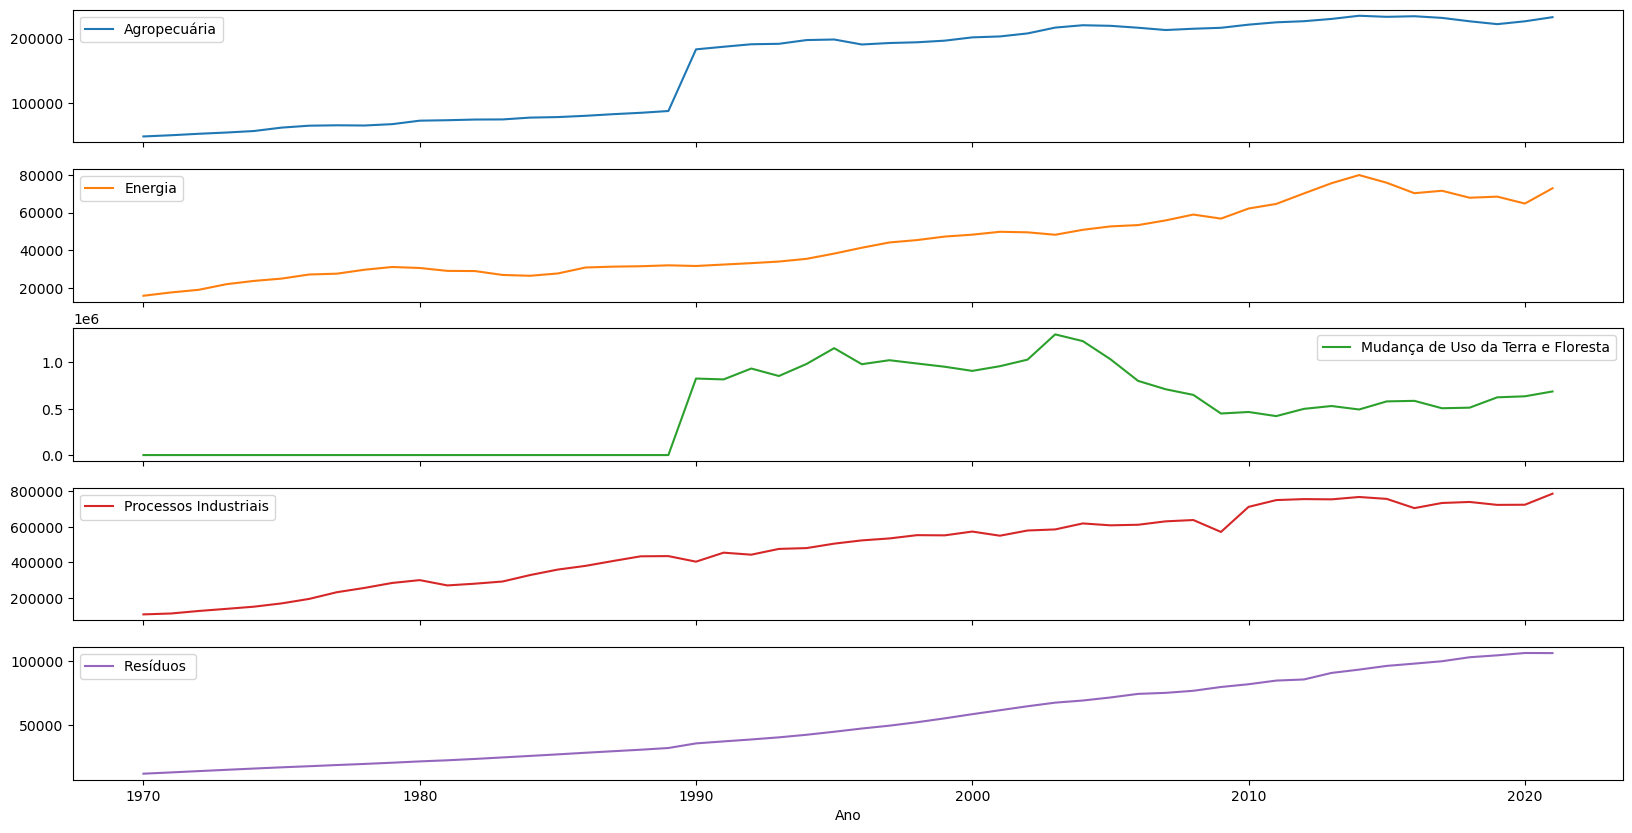

In [54]:
emissao_por_setor.plot(subplots=True, figsize=(20,10));

##### Desafio: hora da prática

Chegou o momento de praticar! Vamos aplicar os conceitos aprendidos durante a aula a partir de algumas atividades. Solucione os problemas propostos através de códigos utilizando a base de dados disponibilizada no curso.

1) Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.

2) Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Nível 1 - Setor".

3) Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

4) Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

5) Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.

In [55]:
emissao_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4955595,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
4955596,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
4955597,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
4955598,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


1) Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.

In [59]:
emissao_por_estado = emissao_gases.groupby(['Estado','Nível 1 - Setor'])[['Emissao']].sum()
emissao_por_estado

Emissao
Estado Nível 1 - Setor                                 
AC     Agropecuária                        9.006097e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        1.589970e+09
...                                                 ...
TO     Agropecuária                        5.296493e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[133 rows x 1 columns]

2) Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Nível 1 - Setor".

In [96]:
emissao_por_estado.xs('Energia', level = 1).sort_values('Emissao',ascending=False)

,Emissao
Estado,
SP,2.214979e+10
MG,9.663844e+09
RJ,9.151787e+09
RS,5.901596e+09
PR,5.502734e+09
BA,4.801368e+09
SC,4.328366e+09
GO,2.761709e+09
PA,2.730706e+09


3) Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

In [99]:
emissao_por_estado.xs('MG', level= 0).idxmax()

Emissao    Agropecuária
dtype: object

4) Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

In [122]:
emissoes_estados_setor = emissao_gases.groupby(['Estado', 'Nível 1 - Setor'])[['Emissao']].sum()
emissoes_estados_setor

Emissao
Estado Nível 1 - Setor                                 
AC     Agropecuária                        9.006097e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        1.589970e+09
...                                                 ...
TO     Agropecuária                        5.296493e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[133 rows x 1 columns]

In [124]:
emissoes_estados_setor.groupby(level = 0).idxmax()

,Emissao
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Agropecuária)"
AM,"(AM, Mudança de Uso da Terra e Floresta)"
AP,"(AP, Mudança de Uso da Terra e Floresta)"
BA,"(BA, Agropecuária)"
BR,"(BR, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Agropecuária)"
DF,"(DF, Energia)"
ES,"(ES, Agropecuária)"


5) Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.

In [131]:
emissoes_estados_setor = emissao_gases.groupby(['Estado', 'Nível 1 - Setor'])[['Emissao']].sum()
emissoes_estados_setor


Emissao
Estado Nível 1 - Setor                                 
AC     Agropecuária                        9.006097e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        1.589970e+09
...                                                 ...
TO     Agropecuária                        5.296493e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[133 rows x 1 columns]

In [132]:
emissoes_estados_setor.groupby(level = 1).idxmax()

,Emissao
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"
